In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [2]:
# Opening CSVs
rat_data = pd.read_csv('clean_csv/final_rat_sightings.csv')
weather_data = pd.read_csv('clean_csv/final_weather.csv')

In [3]:
rat_data.head()

,Unnamed: 0,Incident ID,Sighting Date,Complaint Type,Incident,Location Type,Incident Zip,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
0,0,31464015,2015-09-04,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006,Manhattan,980656.0,197137.0,40.707772,-74.012963
1,1,31464024,2015-09-04,Rodent,Rat Sighting,Commercial Building,10306,Staten Island,955207.0,148858.0,40.575209,-74.104547
2,2,31464025,2015-09-04,Rodent,Rat Sighting,1-2 Family Dwelling,10310,Staten Island,949033.0,169278.0,40.631236,-74.126878
3,3,31464026,2015-09-04,Rodent,Rat Sighting,3+ Family Apt. Building,11206,Brooklyn,1000550.0,197585.0,40.708987,-73.941207
4,4,31464027,2015-09-04,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462,Bronx,1021648.0,250489.0,40.854130,-73.864813


In [4]:
weather_data.head()

,Unnamed: 0,Date,Max Temp (F),Mean Temp (F),Min Temp (F),Max Humidity,Mean Humidity,Min Humidity,Max Pressure (In),Mean Pressure (In),Min Pressure (In),Precipitation (In),City,Season
0,0,2010-01-02,33,25.0,17,89,68,46,29.70,29.67,29.62,0.01,New York City (USA),Winter
1,1,2010-01-03,24,21.0,18,62,53,44,29.64,29.55,29.47,0.00,New York City (USA),Winter
2,2,2010-01-04,32,26.0,20,62,53,43,29.76,29.71,29.66,0.00,New York City (USA),Winter
3,3,2010-01-05,32,27.0,21,62,53,43,29.76,29.73,29.68,0.00,New York City (USA),Winter
4,4,2010-01-06,36,31.0,26,63,52,40,29.80,29.73,29.68,0.00,New York City (USA),Winter


In [5]:
# From our inital analysis we need to match the dates for our analysis
# Range of rat data: '2010-01-01' to '2017-09-16'
# Range of weather data: '2010-01-02' to '2015-12-31'

# Dropping dates > '2015-12-31' and dropping '2010-01-01' from rat data
short_rat_data = rat_data[rat_data['Sighting Date'] <= '2015-12-31'].copy()

rat_data_filtered = short_rat_data[short_rat_data['Sighting Date'] != '2010-01-01']

In [6]:
# Confirming new date range
print(rat_data_filtered['Sighting Date'].min())
print(rat_data_filtered['Sighting Date'].max())

print(weather_data['Date'].min())
print(weather_data['Date'].max())


2010-01-02
2015-12-31
2010-01-02
2015-12-31


In [7]:
# Grouping by day
grouped_rat_data = rat_data_filtered.groupby('Sighting Date').count()[['Incident ID']].reset_index()
grouped_rat_data.head()

,Sighting Date,Incident ID
0,2010-01-02,12
1,2010-01-03,3
2,2010-01-04,23
3,2010-01-05,14
4,2010-01-06,21


In [8]:
# Adding an additional column for year for plotting purposes
grouped_rat_data['Year'] = pd.DatetimeIndex(grouped_rat_data['Sighting Date']).year
grouped_rat_data.head()

,Sighting Date,Incident ID,Year
0,2010-01-02,12,2010
1,2010-01-03,3,2010
2,2010-01-04,23,2010
3,2010-01-05,14,2010
4,2010-01-06,21,2010


In [9]:
weather_data.head()

,Unnamed: 0,Date,Max Temp (F),Mean Temp (F),Min Temp (F),Max Humidity,Mean Humidity,Min Humidity,Max Pressure (In),Mean Pressure (In),Min Pressure (In),Precipitation (In),City,Season
0,0,2010-01-02,33,25.0,17,89,68,46,29.70,29.67,29.62,0.01,New York City (USA),Winter
1,1,2010-01-03,24,21.0,18,62,53,44,29.64,29.55,29.47,0.00,New York City (USA),Winter
2,2,2010-01-04,32,26.0,20,62,53,43,29.76,29.71,29.66,0.00,New York City (USA),Winter
3,3,2010-01-05,32,27.0,21,62,53,43,29.76,29.73,29.68,0.00,New York City (USA),Winter
4,4,2010-01-06,36,31.0,26,63,52,40,29.80,29.73,29.68,0.00,New York City (USA),Winter


In [10]:
# We'll merge the weather dataframe onto the rat sighting dataframe on dates
# Chaning the column name on rat data to match weather data
grouped_rat_data.rename(columns={'Sighting Date': 'Date', 'Incident ID': "Rat Sightings"}, inplace=True)

In [11]:
# Confirming renaming
grouped_rat_data.head()

,Date,Rat Sightings,Year
0,2010-01-02,12,2010
1,2010-01-03,3,2010
2,2010-01-04,23,2010
3,2010-01-05,14,2010
4,2010-01-06,21,2010


In [12]:
# Merging dataframes
merged_wr = pd.merge(grouped_rat_data, weather_data, how='inner', on='Date')
merged_wr.head()

,Date,Rat Sightings,Year,Unnamed: 0,Max Temp (F),Mean Temp (F),Min Temp (F),Max Humidity,Mean Humidity,Min Humidity,Max Pressure (In),Mean Pressure (In),Min Pressure (In),Precipitation (In),City,Season
0,2010-01-02,12,2010,0,33,25.0,17,89,68,46,29.70,29.67,29.62,0.01,New York City (USA),Winter
1,2010-01-03,3,2010,1,24,21.0,18,62,53,44,29.64,29.55,29.47,0.00,New York City (USA),Winter
2,2010-01-04,23,2010,2,32,26.0,20,62,53,43,29.76,29.71,29.66,0.00,New York City (USA),Winter
3,2010-01-05,14,2010,3,32,27.0,21,62,53,43,29.76,29.73,29.68,0.00,New York City (USA),Winter
4,2010-01-06,21,2010,4,36,31.0,26,63,52,40,29.80,29.73,29.68,0.00,New York City (USA),Winter


In [13]:
#merged_wr.drop(columns={'Unnamed: 0'}, inplace=True)
#merged_wr.head()

In [14]:
# Checking for missing values
merged_wr.isna().sum()

Date                  0
Rat Sightings         0
Year                  0
Unnamed: 0            0
Max Temp (F)          0
Mean Temp (F)         0
Min Temp (F)          0
Max Humidity          0
Mean Humidity         0
Min Humidity          0
Max Pressure (In)     0
Mean Pressure (In)    0
Min Pressure (In)     0
Precipitation (In)    0
City                  0
Season                0
dtype: int64

In [15]:
range(len(grouped_rat_data['Date']))

range(0, 2189)

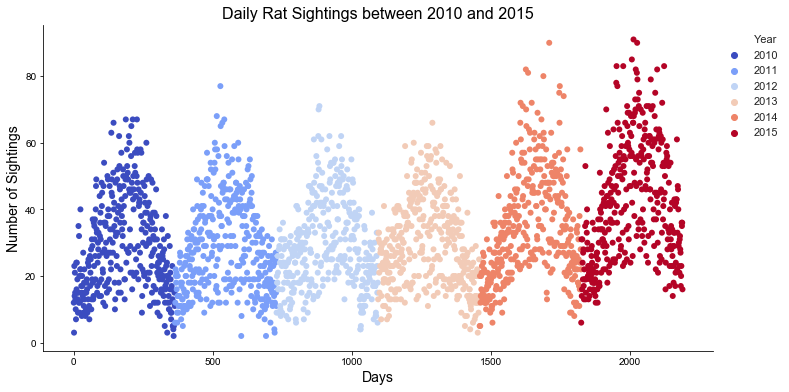

In [16]:
# Plotting a scatter plot graph showing the number of rat sightings per day
x = range(len(grouped_rat_data['Date']))
sightings = grouped_rat_data['Rat Sightings']
year = grouped_rat_data['Year']

dims = (12, 6)
fig, ax = plt.subplots(figsize=dims)
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})


ax = sns.scatterplot(x=x, y=sightings, data=grouped_rat_data, hue=year, 
                     palette="coolwarm", sizes=(1, 8), linewidth=0, legend='full')

ax.legend(frameon=False, bbox_to_anchor=(1, 1), loc=2,)
sns.despine(left=False, bottom=False)

ax.set_title('Daily Rat Sightings between 2010 and 2015', fontsize=16)
ax.set_ylabel('Number of Sightings', fontsize=14)
ax.set_xlabel('Days', fontsize=14)

# Saving fig
imgfile = ('Figures/daily_rat_sightings.png')
plt.savefig(imgfile)

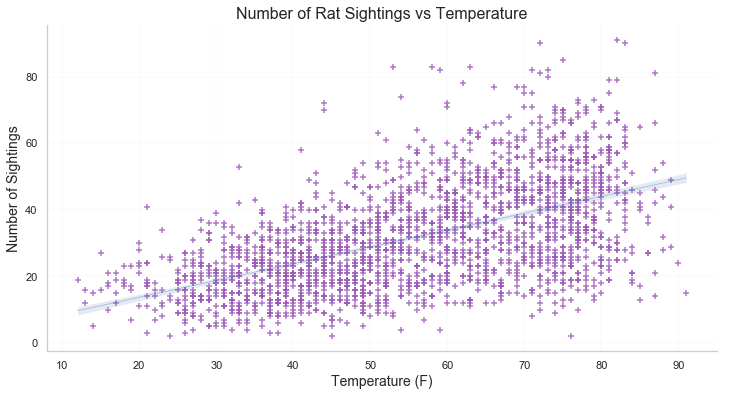

In [17]:
# Plotting a scatter plot graph showing the relationship with weather
temp = merged_wr['Mean Temp (F)']
rats = merged_wr['Rat Sightings']

dims = (12, 6)
fig1, ax1 = plt.subplots(figsize=dims)
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})

ax1 = sns.regplot(x=temp, y=rats, data=merged_wr, ci=95, 
                  marker="+", color='#9b59b6', truncate=True, line_kws={"color":"b","alpha":0.4,"lw":0.8}) # Plotting with 95% CI

sns.despine(left=False, bottom=False)

ax1.set_title('Number of Rat Sightings vs Temperature', fontsize=16)
ax1.set_ylabel('Number of Sightings', fontsize=14)
ax1.set_xlabel('Temperature (F)', fontsize=14)

# Saving fig
imgfile = ('Figures/rat_sightings_v_temp.png')
plt.savefig(imgfile)

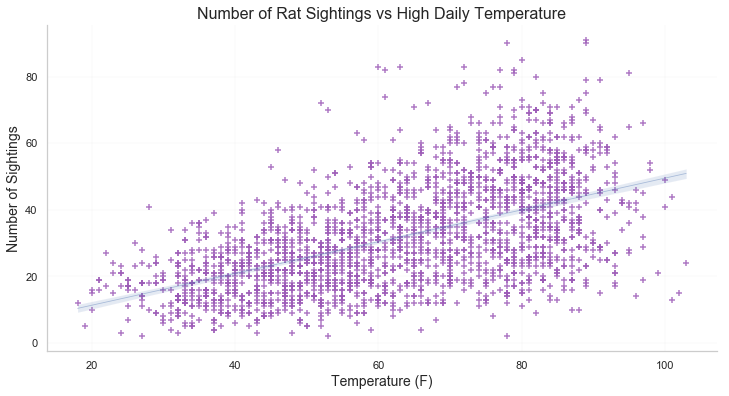

In [18]:
# Plotting a scatter plot graph showing the relationship with weather
temp = merged_wr['Max Temp (F)']
rats = merged_wr['Rat Sightings']

dims = (12, 6)
fig1, ax9 = plt.subplots(figsize=dims)
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})

ax9 = sns.regplot(x=temp, y=rats, data=merged_wr, ci=95, 
                  marker="+", color='#9b59b6', truncate=True, line_kws={"color":"b","alpha":0.4,"lw":0.8}) # Plotting with 95% CI

sns.despine(left=False, bottom=False)

ax9.set_title('Number of Rat Sightings vs High Daily Temperature', fontsize=16)
ax9.set_ylabel('Number of Sightings', fontsize=14)
ax9.set_xlabel('Temperature (F)', fontsize=14)

# Saving fig
imgfile = ('Figures/rat_sightings_v_max_temp.png')
plt.savefig(imgfile)

In [19]:
merged_wr.corr(method='pearson')

,Rat Sightings,Year,Unnamed: 0,Max Temp (F),Mean Temp (F),Min Temp (F),Max Humidity,Mean Humidity,Min Humidity,Max Pressure (In),Mean Pressure (In),Min Pressure (In),Precipitation (In)
Rat Sightings,1.000000,0.257059,0.270170,0.542377,0.552315,0.549832,0.195648,0.141026,0.072240,-0.159144,-0.066790,0.024319,-0.046644
Year,0.257059,1.000000,0.986013,-0.022493,-0.023955,-0.025126,-0.003130,-0.014091,-0.020306,0.194212,0.178941,0.160640,-0.014564
Unnamed: 0,0.270170,0.986013,1.000000,0.028830,0.030979,0.032418,0.014997,0.008119,0.001241,0.195568,0.187591,0.174874,-0.013482
Max Temp (F),0.542377,-0.022493,0.028830,1.000000,0.990164,0.958815,0.339442,0.213516,0.074253,-0.329357,-0.185339,-0.044402,-0.016370
Mean Temp (F),0.552315,-0.023955,0.030979,0.990164,1.000000,0.988906,0.365679,0.271933,0.148551,-0.347407,-0.199585,-0.056350,0.012072
Min Temp (F),0.549832,-0.025126,0.032418,0.958815,0.988906,1.000000,0.385443,0.328010,0.224292,-0.358433,-0.209473,-0.066777,0.041934
Max Humidity,0.195648,-0.003130,0.014997,0.339442,0.365679,0.385443,1.000000,0.880854,0.634745,-0.232445,-0.247199,-0.232023,0.283278
Mean Humidity,0.141026,-0.014091,0.008119,0.213516,0.271933,0.328010,0.880854,1.000000,0.924564,-0.197434,-0.216213,-0.213839,0.365624
Min Humidity,0.072240,-0.020306,0.001241,0.074253,0.148551,0.224292,0.634745,0.924564,1.000000,-0.135033,-0.154754,-0.163665,0.370166
Max Pressure (In),-0.159144,0.194212,0.195568,-0.329357,-0.347407,-0.358433,-0.232445,-0.197434,-0.135033,1.000000,0.934523,0.797067,-0.101518


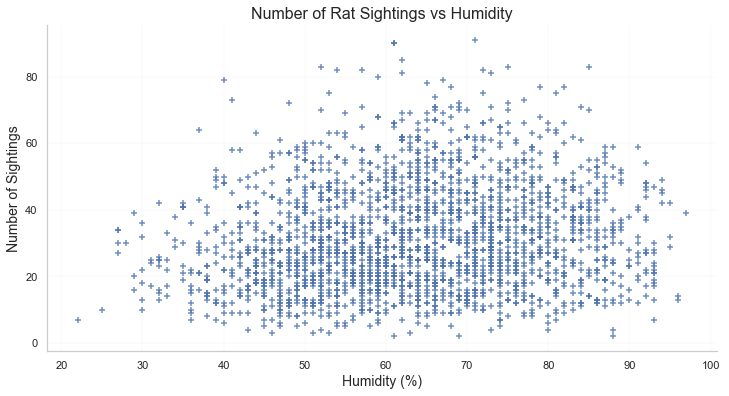

In [20]:
# Plotting a scatter plot graph showing the relationship with humidity
hum = merged_wr['Mean Humidity']
rats = merged_wr['Rat Sightings']

dims = (12, 6)
fig1, ax2 = plt.subplots(figsize=dims)
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})

ax2 = sns.regplot(x=hum, y=rats, data=merged_wr, fit_reg=False, 
                  marker="+", color="b")

sns.despine(left=False, bottom=False)

ax2.set_title('Number of Rat Sightings vs Humidity', fontsize=16)
ax2.set_ylabel('Number of Sightings', fontsize=14)
ax2.set_xlabel('Humidity (%)', fontsize=14)

# Saving fig
imgfile = ('Figures/rat_sightings_v_hum.png')
plt.savefig(imgfile)

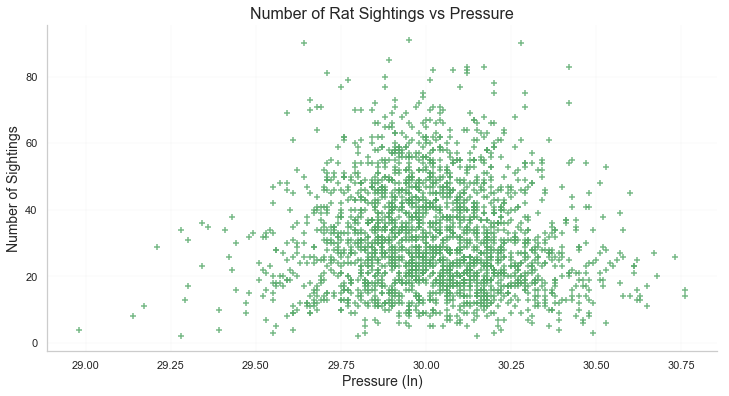

In [21]:
# Plotting a scatter plot graph showing the relationship with pressure
pressure = merged_wr['Mean Pressure (In)']
rats = merged_wr['Rat Sightings']

dims = (12, 6)
fig1, ax2 = plt.subplots(figsize=dims)
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})

ax3 = sns.regplot(x=pressure, y=rats, data=merged_wr, fit_reg=False,
                  marker="+", color="g")

sns.despine(left=False, bottom=False)

ax3.set_title('Number of Rat Sightings vs Pressure', fontsize=16)
ax3.set_ylabel('Number of Sightings', fontsize=14)
ax3.set_xlabel('Pressure (In)', fontsize=14)

# Saving fig
imgfile = ('Figures/rat_sightings_v_pressure.png')
plt.savefig(imgfile)


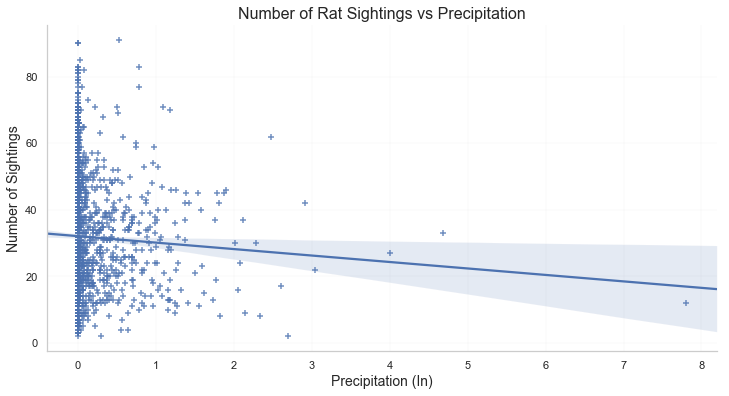

In [22]:
# Plotting a scatter plot graph showing the relationship with precipitation
precip = merged_wr['Precipitation (In)']
rats = merged_wr['Rat Sightings']

dims = (12, 6)
fig1, ax5 = plt.subplots(figsize=dims)
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})

ax3 = sns.regplot(x=precip, y=rats, data=merged_wr, fit_reg=True,
                  marker="+", color="b")

sns.despine(left=False, bottom=False)

ax5.set_title('Number of Rat Sightings vs Precipitation', fontsize=16)
ax5.set_ylabel('Number of Sightings', fontsize=14)
ax5.set_xlabel('Precipitation (In)', fontsize=14)

# Saving fig
imgfile = ('Figures/rat_sightings_v_precip.png')
plt.savefig(imgfile)

In [23]:
# Let's remove trace amounts of rain
rainy_merged_wr = merged_wr[merged_wr['Precipitation (In)'] > 0.1]
rainy_merged_wr.head()

,Date,Rat Sightings,Year,Unnamed: 0,Max Temp (F),Mean Temp (F),Min Temp (F),Max Humidity,Mean Humidity,Min Humidity,Max Pressure (In),Mean Pressure (In),Min Pressure (In),Precipitation (In),City,Season
15,2010-01-17,9,2010,15,42,37.0,31,92,78,64,30.13,29.92,29.52,0.64,New York City (USA),Winter
23,2010-01-25,22,2010,23,53,49.0,45,100,86,71,29.85,29.43,29.26,0.85,New York City (USA),Winter
35,2010-02-06,9,2010,35,33,27.0,21,75,59,42,29.94,29.78,29.64,0.11,New York City (USA),Winter
39,2010-02-10,13,2010,39,33,32.0,30,100,93,85,29.77,29.29,29.02,1.16,New York City (USA),Winter
45,2010-02-16,15,2010,45,34,32.0,30,92,75,58,29.62,29.48,29.38,0.40,New York City (USA),Winter


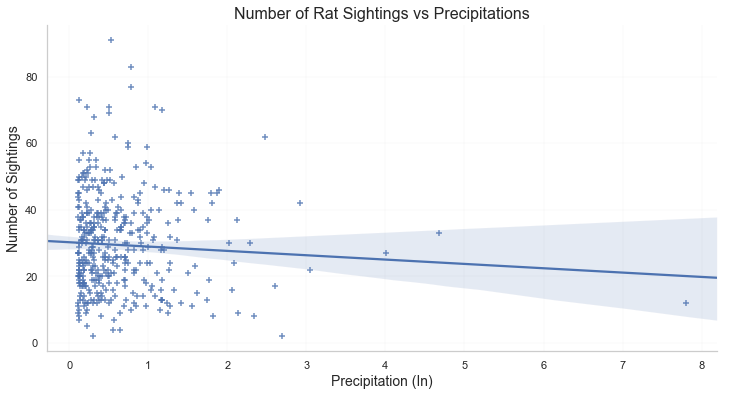

In [24]:
# Plotting a scatter plot graph showing the relationship with precipitation
precip = rainy_merged_wr['Precipitation (In)']
rats = rainy_merged_wr['Rat Sightings']

dims = (12, 6)
fig1, ax7 = plt.subplots(figsize=dims)
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})

ax7 = sns.regplot(x=precip, y=rats, data=rainy_merged_wr, fit_reg=True, robust=True,
                  marker="+", color="b")

sns.despine(left=False, bottom=False)

ax7.set_title('Number of Rat Sightings vs Precipitations', fontsize=16)
ax7.set_ylabel('Number of Sightings', fontsize=14)
ax7.set_xlabel('Precipitation (In)', fontsize=14)

# Saving fig
imgfile = ('Figures/rat_sightings_v_rain.png')
plt.savefig(imgfile)

In [25]:
summer_rainy_merged_wr = rainy_merged_wr[rainy_merged_wr['Season'] == 'Summer']
summer_rainy_merged_wr.head()

,Date,Rat Sightings,Year,Unnamed: 0,Max Temp (F),Mean Temp (F),Min Temp (F),Max Humidity,Mean Humidity,Min Humidity,Max Pressure (In),Mean Pressure (In),Min Pressure (In),Precipitation (In),City,Season
171,2010-06-22,57,2010,171,84,78.0,71,90,68,45,30.14,30.07,29.99,0.18,New York City (USA),Summer
192,2010-07-13,53,2010,192,83,79.0,74,94,84,74,29.96,29.91,29.85,0.85,New York City (USA),Summer
193,2010-07-14,49,2010,193,82,78.0,74,94,82,69,29.96,29.90,29.86,0.29,New York City (USA),Summer
198,2010-07-19,62,2010,198,88,81.0,74,85,70,55,29.88,29.84,29.78,0.58,New York City (USA),Summer
202,2010-07-23,34,2010,202,84,79.0,74,79,61,42,30.04,29.94,29.86,0.61,New York City (USA),Summer


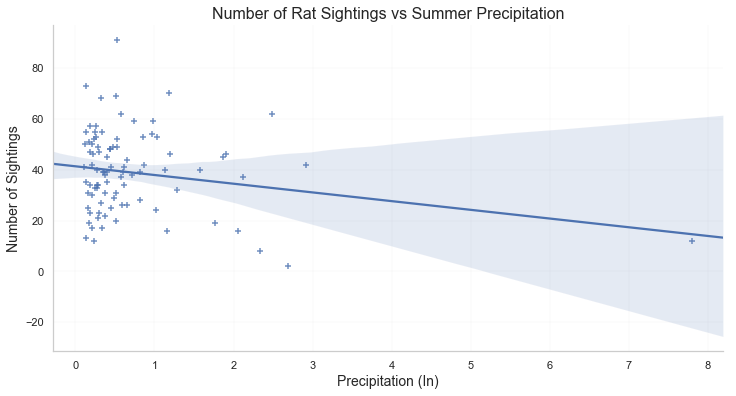

In [26]:
# Plotting a scatter plot graph showing the relationship with summer precipitations
precip = summer_rainy_merged_wr['Precipitation (In)']
rats = summer_rainy_merged_wr['Rat Sightings']

dims = (12, 6)
fig1, ax8 = plt.subplots(figsize=dims)
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})

ax8 = sns.regplot(x=precip, y=rats, data=rainy_merged_wr, fit_reg=True, robust=True,
                  marker="+", color="b")

sns.despine(left=False, bottom=False)

ax8.set_title('Number of Rat Sightings vs Summer Precipitation', fontsize=16)
ax8.set_ylabel('Number of Sightings', fontsize=14)
ax8.set_xlabel('Precipitation (In)', fontsize=14)

# Saving fig
imgfile = ('Figures/rat_sightings_v_summer_rain.png')
plt.savefig(imgfile)

In [27]:
# let's look at the effect of rain on rat sightings
# We'll only look at the summer months
grouped_season = merged_wr.groupby(['Year', 'Season']).sum()[['Rat Sightings', 'Precipitation (In)']].reset_index()
grouped_season.head()

,Year,Season,Rat Sightings,Precipitation (In)
0,2010,Autumn,2102,10.77
1,2010,Spring,3056,12.25
2,2010,Summer,3768,7.86
3,2010,Winter,1512,11.44
4,2011,Autumn,2119,10.79


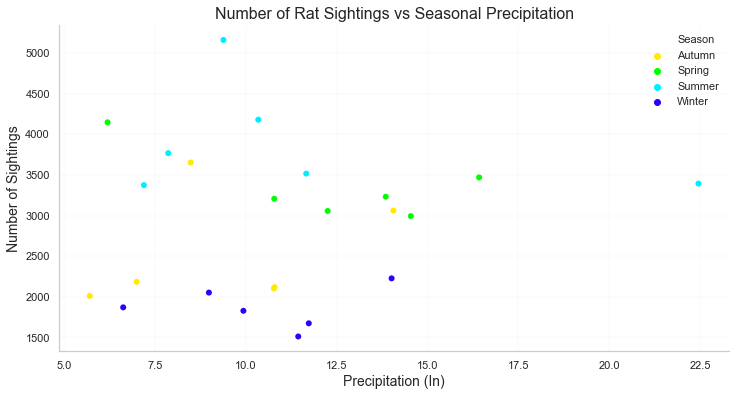

In [28]:
# Plotting a scatter plot graph showing the relationship with precipitation
summer_precip = grouped_season['Precipitation (In)']
rats = grouped_season['Rat Sightings']
season = grouped_season['Season']

dims = (12, 6)
fig1, ax6 = plt.subplots(figsize=dims)
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})

ax6 = sns.scatterplot(x=summer_precip, y=rats, data=grouped_season, hue=season, 
                     palette="gist_rainbow", sizes=(1, 8), linewidth=0, legend='full')

sns.despine(left=False, bottom=False)
ax6.legend(frameon=False)


ax6.set_title('Number of Rat Sightings vs Seasonal Precipitation', fontsize=16)
ax6.set_ylabel('Number of Sightings', fontsize=14)
ax6.set_xlabel('Precipitation (In)', fontsize=14)

# Saving fig
imgfile = ('Figures/rat_sightings_v_season_precip.png')
plt.savefig(imgfile)